In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
# Check first 5 rows of the data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check info to find ut about all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df2 = df[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'SalePrice']]

In [6]:
df2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,SalePrice
0,60,65.0,8450,7,5,2003,208500
1,20,80.0,9600,6,8,1976,181500
2,60,68.0,11250,7,5,2001,223500
3,70,60.0,9550,7,5,1915,140000
4,60,84.0,14260,8,5,2000,250000


In [7]:
df2.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,755000.000000


<AxesSubplot:>

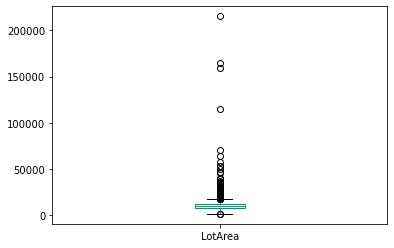

In [8]:
# Detect outliers in LotArea
df['LotArea'].plot.box()

In [9]:
df[df['LotArea'] > 100000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


In [10]:
# Exclude outliers
df2 = df2[df2['LotArea'] < 100000]

<AxesSubplot:>

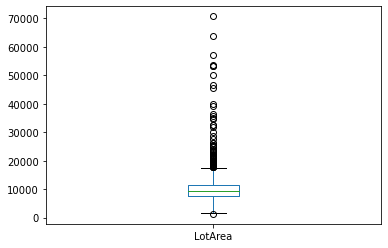

In [11]:
df2['LotArea'].plot.box()

In [15]:
df[(df['LotArea'] > 40000) & (df['LotArea'] < 100000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
384,385,60,RL,NaN,53107,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,240000
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
457,458,20,RL,NaN,53227,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,256000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
661,662,60,RL,52.0,46589,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,402000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
848,849,50,RL,75.0,45600,Pave,NaN,IR2,Bnk,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,240000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


<AxesSubplot:>

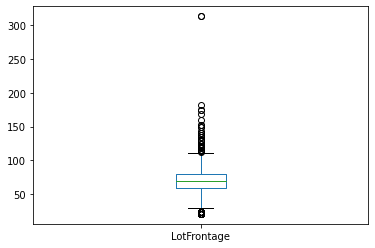

In [17]:
df['LotFrontage'].plot.box()

<AxesSubplot:>

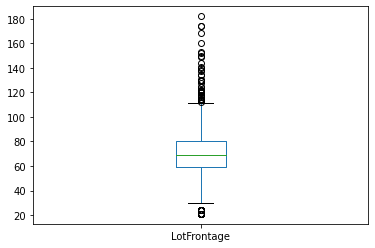

In [20]:
df[df['LotFrontage']< 300]['LotFrontage'].plot.box()

<AxesSubplot:ylabel='Frequency'>

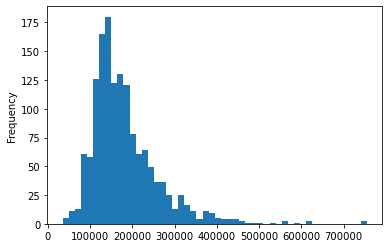

In [22]:
df['SalePrice'].plot.hist(bins=50)

In [24]:
df.groupby('MSSubClass').mean()['SalePrice']

MSSubClass
20     185224.811567
30      95829.724638
40     156125.000000
45     108591.666667
50     143302.972222
60     239948.501672
70     166772.416667
75     192437.500000
80     169736.551724
85     147810.000000
90     133541.076923
120    200779.080460
160    138647.380952
180    102300.000000
190    129613.333333
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='MSSubClass'>

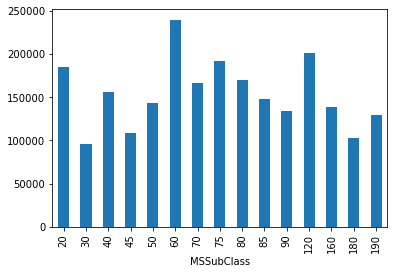

In [25]:
df.groupby('MSSubClass').mean()['SalePrice'].plot.bar()

In [26]:
df.groupby('YearBuilt').mean()['SalePrice']

YearBuilt
1872    122000.000000
1875     94000.000000
1880    200619.750000
1882    168000.000000
1885    111250.000000
            ...      
2006    251775.447761
2007    255362.734694
2008    348849.130435
2009    269220.000000
2010    394432.000000
Name: SalePrice, Length: 112, dtype: float64

<AxesSubplot:xlabel='YearBuilt'>

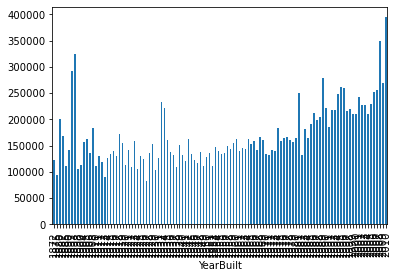

In [29]:
df.groupby('YearBuilt').mean()['SalePrice'].plot.bar()

In [32]:
mapping = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

df2['heating_label'] = df['HeatingQC'].map(mapping)

In [33]:
df2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,SalePrice,heating_label
0,60,65.0,8450,7,5,2003,208500,5
1,20,80.0,9600,6,8,1976,181500,5
2,60,68.0,11250,7,5,2001,223500,5
3,70,60.0,9550,7,5,1915,140000,4
4,60,84.0,14260,8,5,2000,250000,5


In [34]:
corr_df = df2.corr()
corr_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,SalePrice,heating_label
MSSubClass,1.000000,-0.385845,-0.271663,0.035269,-0.060902,0.028233,-0.083704,-0.022941
LotFrontage,-0.385845,1.000000,0.537413,0.251125,-0.058073,0.124397,0.347763,0.102406
LotArea,-0.271663,0.537413,1.000000,0.178984,-0.020832,0.042309,0.354494,0.037376
OverallQual,0.035269,0.251125,0.178984,1.000000,-0.091319,0.572631,0.792761,0.459438
OverallCond,-0.060902,-0.058073,-0.020832,-0.091319,1.000000,-0.375955,-0.078005,-0.015081
YearBuilt,0.028233,0.124397,0.042309,0.572631,-0.375955,1.000000,0.525587,0.449367
SalePrice,-0.083704,0.347763,0.354494,0.792761,-0.078005,0.525587,1.000000,0.432704
heating_label,-0.022941,0.102406,0.037376,0.459438,-0.015081,0.449367,0.432704,1.000000


<AxesSubplot:>

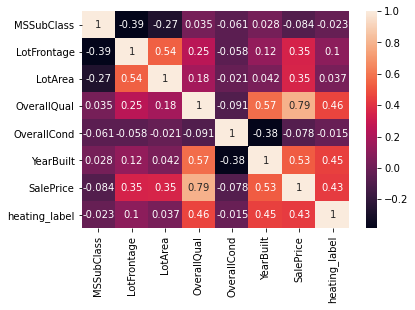

In [35]:
import seaborn as sns

sns.heatmap(corr_df, annot=True)